# Cleaning Data in Python
- William Surles
- 2017-10-24
- Datacamp course notes
- https://www.datacamp.com/courses/cleaning-data-in-python

## Whats Covered
- Exploring your data
 - Diagnose data for cleaning
 - Exploratory data analysis
 - Visual exploratory data analysis
- Tidying data for analysis
 - Tidy data
 - Pivoting data
 - Beyond melt and pivot
- Combining data for analysis
 - Concatenating data
 - Finding and concatenating data
 - Merge data
- Cleaning data for analysis
 - Data types
 - Using regular expressions to clean strings
 - Using functions to clean data
 - Duplicate and missing data
 - Testing with asserts
- Case study
 - Putting it all together
 - Initial impressions of the data

## Additional Resources

## Libraries and Data

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

# Exploring you data

## Diagnose data for cleaning

In [189]:
file = 'literary_birth_rate.csv'
df_birth = pd.read_csv(file, sep = ';')

In [190]:
df_birth.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [191]:
df_birth.tail()

,Country,Continent,female literacy,fertility,population
157,Vanuatu,OCE,79.5,3.883,"233,866"
158,Samoa,OCE,98.5,3.852,"178,869"
159,Sao Tomé-et-Principe,AF,83.3,3.718,"160,174"
160,Aruba,LAT,98.0,1.732,"105,455"
161,Tonga,ASI,99.1,3.928,"103,566"


In [192]:
df_birth.columns

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')

In [193]:
df_birth.shape

(162, 5)

In [194]:
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            162 non-null object
Continent          162 non-null object
female literacy    162 non-null float64
fertility          162 non-null float64
population         162 non-null object
dtypes: float64(2), object(3)
memory usage: 6.4+ KB


### Loading and viewing your data

- head and tail won't let you see everything you need because the df has so many columns

In [195]:
file = 'https://assets.datacamp.com/production/course_2023/datasets/dob_job_application_filings_subset.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# Print the head of df
print(df.head())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [196]:
# Print the tail of df
print(df.tail())

           Job #  Doc #        Borough       House #  \
12841  520143988      1  STATEN ISLAND  8              
12842  121613833      1      MANHATTAN  724            
12843  121681260      1      MANHATTAN  350            
12844  320771704      1       BROOKLYN  499            
12845  520143951      1  STATEN ISLAND  1755           

                            Street Name  Block  Lot    Bin # Job Type  \
12841  NOEL STREET                        5382   20  5069722       A2   
12842  10 AVENUE                          1059    4  1082503       A2   
12843  MANHATTAN AVE.                     1848   31  1055849       A2   
12844  UNION STREET                        431   43  3007185       A2   
12845  RICHMOND ROAD                       887   28  5022931       A2   

      Job Status           ...                         Owner's Last Name  \
12841          D           ...            MALITO                           
12842          D           ...            CROMAN                        

In [197]:
# Print the shape of df
print(df.shape)

(12846, 82)


In [198]:
# Print the columns of df
print(df.columns)

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [199]:
df_subset = df[['Job #','Doc #','Borough','Initial Cost','Total Est. Fee',
                'Existing Zoning Sqft','Proposed Zoning Sqft','Enlargement SQ Footage',
                'Street Frontage','ExistingNo. of Stories','Proposed No. of Stories',
                'Existing Height','Proposed Height']]

# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())

       Job #  Doc #        Borough Initial Cost Total Est. Fee  \
0  121577873      2      MANHATTAN    $75000.00        $986.00   
1  520129502      1  STATEN ISLAND        $0.00       $1144.00   
2  121601560      1      MANHATTAN    $30000.00        $522.50   
3  121601203      1      MANHATTAN     $1500.00        $225.00   
4  121601338      1      MANHATTAN    $19500.00        $389.50   

   Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
0                0                       0                        0   
1              143    

### Further diagnosis

- The `Initial Cost` and `Total Est. Fee` columns are objects. 
 - We need to clean this up
- Also there are a lot of 0 values here which are likely just missing values

In [200]:
# Print the info of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [201]:
# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB
None


## Exploratory data analysis

In [202]:
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            162 non-null object
Continent          162 non-null object
female literacy    162 non-null float64
fertility          162 non-null float64
population         162 non-null object
dtypes: float64(2), object(3)
memory usage: 6.4+ KB


In [203]:
# frequency count
df_birth.Continent.value_counts(dropna=False)

AF     49
ASI    47
EUR    36
LAT    24
OCE     4
NAM     2
Name: Continent, dtype: int64

In [204]:
# Frequency counts using bracket notation 
df_birth['Continent'].value_counts(dropna=False)

AF     49
ASI    47
EUR    36
LAT    24
OCE     4
NAM     2
Name: Continent, dtype: int64

In [205]:
# chaining head onto the frequency count
df_birth['Country '].value_counts(dropna=False).head()

Pakistan         1
Mongolie         1
Guinée-Bissau    1
Botswana         1
Italie           1
Name: Country , dtype: int64

In [206]:
# population is a string because of the commas. humm
df_birth.population.value_counts(dropna=False).head()

515,124       1
4,926,877     1
13,481,424    1
15,233,884    1
862,434       1
Name: population, dtype: int64

#### Summary Statistics

In [207]:
df_birth.describe()

,female literacy,fertility
count,162.000000,162.000000
mean,80.107407,2.878673
std,23.052415,1.427597
min,12.600000,0.966000
25%,66.425000,1.823250
50%,90.000000,2.367500
75%,98.500000,3.880250
max,100.000000,7.069000


### Calculating summary statistics

In [208]:
df_subset.describe()

,Job #,Doc #,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
count,1.284600e+04,12846.000000,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000
mean,2.426788e+08,1.162930,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562
std,1.312507e+08,0.514937,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666
min,1.036438e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.216206e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000
50%,2.202645e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000
75%,3.208652e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000
max,5.400246e+08,9.000000,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000


### Frequency counts for categorical data

- the `describe()` method is good for checking on numerical columns
- `value_counts()` is good for checking on ctegorical columns

In [209]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64


In [210]:
# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
MD        7
DC        7
GA        6
KS        6
MA        6
VA        5
CO        4
AZ        3
MN        3
WI        3
SC        3
RI        2
UT        2
NC        2
WA        1
NM        1
MI        1
IN        1
VT        1
Name: State, dtype: int64


In [211]:
# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


## Visual exploratory data analysis

- Sometimes extreme values will stand out much more in a chart
- We use bar plots for discrete data and histograms for continuous data

In [212]:
df_birth.describe()

,female literacy,fertility
count,162.000000,162.000000
mean,80.107407,2.878673
std,23.052415,1.427597
min,12.600000,0.966000
25%,66.425000,1.823250
50%,90.000000,2.367500
75%,98.500000,3.880250
max,100.000000,7.069000


In [213]:
# Lets fix the population column real quick
df_birth.population = pd.to_numeric(df_birth.population.str.replace(',',''))

In [214]:
df_birth.describe()

,female literacy,fertility,population
count,162.000000,162.000000,1.620000e+02
mean,80.107407,2.878673,4.068708e+07
std,23.052415,1.427597,1.409695e+08
min,12.600000,0.966000,1.035660e+05
25%,66.425000,1.823250,3.368292e+06
50%,90.000000,2.367500,9.707404e+06
75%,98.500000,3.880250,2.882991e+07
max,100.000000,7.069000,1.324655e+09


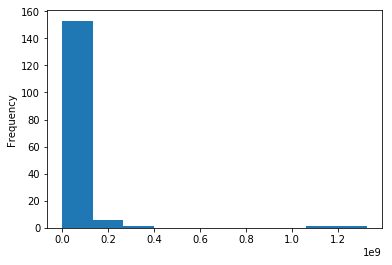

In [215]:
df_birth.population.plot('hist')
plt.show()

In [216]:
# find the countries that have over 1 billion people. (thats kind of a lot)
df_birth[df_birth.population > 1000000000]


,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,1324655000
1,Inde,ASI,50.8,2.682,1139964932


#### Box Plot

/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


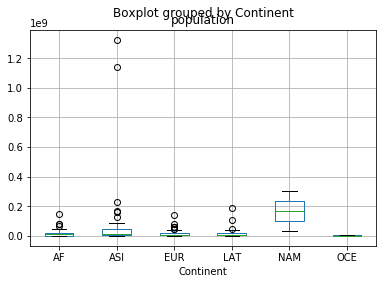

In [217]:
df_birth.boxplot(column='population', by = 'Continent')
plt.show()

#### Scatter plots
- Relationship between 2 numeric variables
- Flag potentially bad data
 - Errors not found by looking at 1 variable

### Visualizing single variables with histograms

In [218]:
df_subset['Existing Zoning Sqft'].describe()

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64

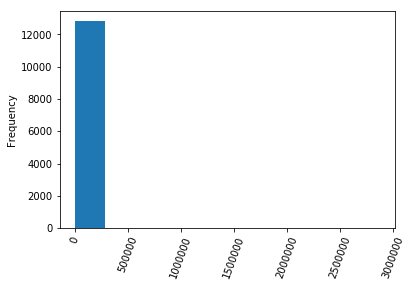

In [219]:
# Plot the histogram
df_subset['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=False, logy=False)
plt.show()

- This is a pretty bad histogram out of the box. 
- I don't know how to tweek it yet though to make it useful. 
- I think most of the data is 0 though

### Visualizing multiple variables with boxplots

In [220]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB


In [221]:
df_subset['Initial Cost'].head()

0    $75000.00
1        $0.00
2    $30000.00
3     $1500.00
4    $19500.00
Name: Initial Cost, dtype: object

In [222]:
df_subset['Total Est. Fee'].head()

0     $986.00
1    $1144.00
2     $522.50
3     $225.00
4     $389.50
Name: Total Est. Fee, dtype: object

In [225]:
df_subset['Initial Cost'] = pd.to_numeric(df_subset['Initial Cost'].str.replace('$',''), 
                                          errors = 'coerce') 

df_subset['Total Est. Fee'] = pd.to_numeric(df_subset['Total Est. Fee'].str.replace('$',''), 
                                          errors = 'coerce') 

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null float64
Total Est. Fee             12846 non-null float64
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: float64(2), int64(10), object(1)
memory usage: 1.3+ MB


/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


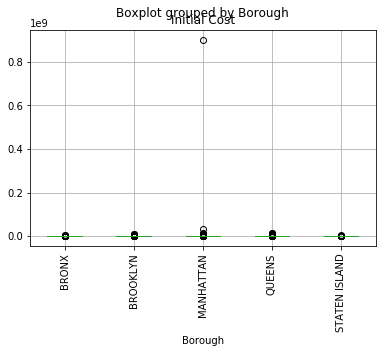

In [226]:
# Create the boxplot
df_subset.boxplot(column='Initial Cost', by='Borough', rot=90)

# Display the plot
plt.show()

### Visualizing multiple variables with scatter plots

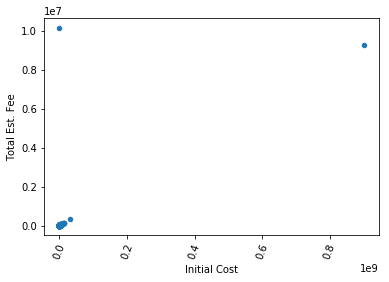

In [227]:
# Create and display the first scatter plot
df_subset.plot(kind='scatter', x='Initial Cost', y='Total Est. Fee', rot=70)
plt.show()

In [228]:
df_subset['Total Est. Fee'].describe()

count    1.284600e+04
mean     2.894909e+03
std      1.213534e+05
min      0.000000e+00
25%      2.250000e+02
50%      4.195000e+02
75%      9.297000e+02
max      1.014000e+07
Name: Total Est. Fee, dtype: float64

In [229]:
df_subset2 = df_subset[df_subset['Total Est. Fee'] <= 1000000]

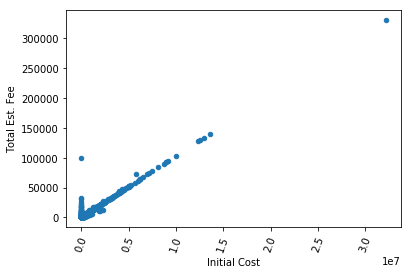

In [230]:
# Create and display the second scatter plot
df_subset2.plot(kind='scatter', x='Initial Cost', y='Total Est. Fee', rot=70)
plt.show()

# Tidying data for analysis

## Tidy data

#### Principles of tidy data
- Columns represent separate variables
- Rows represent individual observations
- Each type of observational units is stored in a separate table

#### Melting

In [320]:
df = pd.DataFrame([['Daniel','-',42],
                   ['John', 12, 31],
                   ['Jane', 24, 27]])
df.columns = ['name','treatment a','treatment b']
print(df)

     name treatment a  treatment b
0  Daniel           -           42
1    John          12           31
2    Jane          24           27


In [323]:
df_melt = pd.melt(frame=df, id_vars='name',
       value_vars=['treatment a', 'treatment b'],
       var_name = 'treatment',
       value_name = 'result')
df_melt

,name,treatment,result
0,Daniel,treatment a,-
1,John,treatment a,12
2,Jane,treatment a,24
3,Daniel,treatment b,42
4,John,treatment b,31
5,Jane,treatment b,27


### Recognizing tidy data

- Remember that tidy data has
 - one observation per row (this is like readings all at one time or info about one person, or something)
 - one variable per column. Melted data may not be tidy. Each type of reading should be in its own column. Wind speed, temp, etc. or height, weight, etc. 
  

### Reshaping your data using melt

In [326]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(
    airquality, 
    id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())


      Ozone  Solar.R  Wind  Temp  Month  Day
0  41.00000    190.0   7.4    67      5    1
1  36.00000    118.0   8.0    72      5    2
2  12.00000    149.0  12.6    74      5    3
3  18.00000    313.0  11.5    62      5    4
4  42.12931      NaN  14.3    56      5    5
   Month  Day variable     value
0      5    1    Ozone  41.00000
1      5    2    Ozone  36.00000
2      5    3    Ozone  12.00000
3      5    4    Ozone  18.00000
4      5    5    Ozone  42.12931


### Customizing melted data

In [327]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(
    airquality, 
    id_vars=['Month', 'Day'], 
    var_name='measurement', 
    value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())


      Ozone  Solar.R  Wind  Temp  Month  Day
0  41.00000    190.0   7.4    67      5    1
1  36.00000    118.0   8.0    72      5    2
2  12.00000    149.0  12.6    74      5    3
3  18.00000    313.0  11.5    62      5    4
4  42.12931      NaN  14.3    56      5    5
   Month  Day measurement   reading
0      5    1       Ozone  41.00000
1      5    2       Ozone  36.00000
2      5    3       Ozone  12.00000
3      5    4       Ozone  18.00000
4      5    5       Ozone  42.12931


## Pivoting data

#### Pivot table
- You can not 'pivot' when there are duplicate entires
- But 'pivot_table' has a parameter that specifies ow to deal with diplicate values
 - for example, you can aggregate the duplicate values by taking their average.

### Pivot data

In [330]:
# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day measurement   reading
0      5    1       Ozone  41.00000
1      5    2       Ozone  36.00000
2      5    3       Ozone  12.00000
3      5    4       Ozone  18.00000
4      5    5       Ozone  42.12931


In [329]:
# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

measurement     Ozone  Solar.R  Temp  Wind
Month Day                                 
5     1      41.00000    190.0  67.0   7.4
      2      36.00000    118.0  72.0   8.0
      3      12.00000    149.0  74.0  12.6
      4      18.00000    313.0  62.0  11.5
      5      42.12931      NaN  56.0  14.3


### Resetting the index of a DataFrame

In [331]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

In [332]:
# Reset the index of airquality_pivot: airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the new index of airquality_pivot
print(airquality_pivot.index)

RangeIndex(start=0, stop=153, step=1)


In [333]:
# Print the head of airquality_pivot
print(airquality_pivot.head())

measurement  Month  Day     Ozone  Solar.R  Temp  Wind
0                5    1  41.00000    190.0  67.0   7.4
1                5    2  36.00000    118.0  72.0   8.0
2                5    3  12.00000    149.0  74.0  12.6
3                5    4  18.00000    313.0  62.0  11.5
4                5    5  42.12931      NaN  56.0  14.3


### Pivoting duplicate values

In [341]:
airquality_dup = pd.concat([airquality_melt, airquality_melt])

In [342]:
print(airquality_dup.shape)
print(airquality_melt.shape)
print(airquality_dup.head())
print(airquality_melt.head())

(1224, 4)
(612, 4)
   Month  Day measurement   reading
0      5    1       Ozone  41.00000
1      5    2       Ozone  36.00000
2      5    3       Ozone  12.00000
3      5    4       Ozone  18.00000
4      5    5       Ozone  42.12931
   Month  Day measurement   reading
0      5    1       Ozone  41.00000
1      5    2       Ozone  36.00000
2      5    3       Ozone  12.00000
3      5    4       Ozone  18.00000
4      5    5       Ozone  42.12931


In [344]:
# Pivot airquality_dup: airquality_pivot
airquality_pivot = airquality_dup.pivot_table(
    index=['Month', 'Day'], 
    columns= 'measurement', 
    values= 'reading', 
    aggfunc= np.mean)

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot.head())

# Print the head of airquality
print(airquality.head())

measurement  Month  Day     Ozone  Solar.R  Temp  Wind
0                5    1  41.00000    190.0  67.0   7.4
1                5    2  36.00000    118.0  72.0   8.0
2                5    3  12.00000    149.0  74.0  12.6
3                5    4  18.00000    313.0  62.0  11.5
4                5    5  42.12931      NaN  56.0  14.3
      Ozone  Solar.R  Wind  Temp  Month  Day
0  41.00000    190.0   7.4    67      5    1
1  36.00000    118.0   8.0    72      5    2
2  12.00000    149.0  12.6    74      5    3
3  18.00000    313.0  11.5    62      5    4
4  42.12931      NaN  14.3    56      5    5


## Beyond melt and pivot

### Splitting a column with .str

In [347]:
tb = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/tb.csv')
print(tb.head())

  country  year  m014  m1524  m2534  m3544  m4554  m5564   m65  mu  f014  \
0      AD  2000   0.0    0.0    1.0    0.0    0.0    0.0   0.0 NaN   NaN   
1      AE  2000   2.0    4.0    4.0    6.0    5.0   12.0  10.0 NaN   3.0   
2      AF  2000  52.0  228.0  183.0  149.0  129.0   94.0  80.0 NaN  93.0   
3      AG  2000   0.0    0.0    0.0    0.0    0.0    0.0   1.0 NaN   1.0   
4      AL  2000   2.0   19.0   21.0   14.0   24.0   19.0  16.0 NaN   3.0   

   f1524  f2534  f3544  f4554  f5564   f65  fu  
0    NaN    NaN    NaN    NaN    NaN   NaN NaN  
1   16.0    1.0    3.0    0.0    0.0   4.0 NaN  
2  414.0  565.0  339.0  205.0   99.0  36.0 NaN  
3    1.0    1.0    0.0    0.0    0.0   0.0 NaN  
4   11.0   10.0    8.0    8.0    5.0  11.0 NaN  


In [348]:
# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())


  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


### Splitting a column with .split() and .get()

In [349]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, 
    id_vars=['Date', 'Day'], 
    var_name='type_country', 
    value_name='counts')

ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [350]:
# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [351]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

ebola_melt.head()

,Date,Day,type_country,counts,str_split,type
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases


In [352]:
# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


# Combining data for analysis

## Concatenating data

### Combining rows of data

In [355]:
# Load uber data
uber = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/nyc_uber_2014.csv')
print(uber.shape)
print(uber.head())

(297, 5)
   Unnamed: 0         Date/Time      Lat      Lon    Base
0           0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1           1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2           2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3           3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4           4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [357]:
# make 3 uber dataframes
uber1 = uber[0:99]
uber2 = uber[100:199]
uber3 = uber[200:]

print(uber1.head())
print(uber3.tail())

   Unnamed: 0         Date/Time      Lat      Lon    Base
0           0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1           1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2           2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3           3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4           4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
     Unnamed: 0         Date/Time      Lat      Lon    Base
292          94  6/1/2014 6:27:00  40.7554 -73.9738  B02512
293          95  6/1/2014 6:35:00  40.7543 -73.9817  B02512
294          96  6/1/2014 6:37:00  40.7751 -73.9633  B02512
295          97  6/1/2014 6:46:00  40.6952 -74.1784  B02512
296          98  6/1/2014 6:51:00  40.7621 -73.9817  B02512


In [358]:
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1, uber2, uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())
print(row_concat.tail())


(295, 5)
   Unnamed: 0         Date/Time      Lat      Lon    Base
0           0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1           1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2           2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3           3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4           4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
     Unnamed: 0         Date/Time      Lat      Lon    Base
292          94  6/1/2014 6:27:00  40.7554 -73.9738  B02512
293          95  6/1/2014 6:35:00  40.7543 -73.9817  B02512
294          96  6/1/2014 6:37:00  40.7751 -73.9633  B02512
295          97  6/1/2014 6:46:00  40.6952 -74.1784  B02512
296          98  6/1/2014 6:51:00  40.7621 -73.9817  B02512


### Combining columns of data

In [359]:
ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


In [362]:
# Split ebola data
ebola_melt_1 = ebola_melt.iloc[:,0:4]
print(ebola_melt_1.head())

status_country = ebola_melt.iloc[:,5:]
print(status_country.head())

         Date  Day  type_country  counts
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0
    type country
0  Cases  Guinea
1  Cases  Guinea
2  Cases  Guinea
3  Cases  Guinea
4  Cases  Guinea


In [363]:
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt_1, status_country], axis = 1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
print(ebola_tidy.head())


(1952, 6)
         Date  Day  type_country  counts   type country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


## Finding and concatenating data

#### Concatenating many files
- Leverage Python's features with data cleaning in pandas
- In order to concatenate DataFrames:
 - They most be in a lit
 - Can individually load if there are a few datasets
 - But what if there are thousands?
- Solution: `glob` function to find files based on a pattern

#### Globing
- Pattern matching for file names
- Wildcards: *?
 - Any csv file: *.csv
 - Any single character: file_?.csv
- Returns a list of file names
- Can use this list to load into separate pandas dataframes

#### The plan
- Load files from globbing into pandas
- Add the DataFrames into a list
- Concatenate multiple datasets as once with `pd.concat`

In [ ]:
import glob

csv_files = glob.glob('*.csv')

print(csv_files)

list_data = []

for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)
    
df = pd.concat(list_data)
    


In [369]:
## I need to create some files to use in the globing exercises
uber1.to_csv('uber1.csv', index=False)
uber2.to_csv('uber2.csv', index=False)
uber3.to_csv('uber3.csv', index=False)

### Finding files that match a pattern

In [370]:
# Import necessary modules
import glob
import pandas as pd

# Write the pattern: pattern
pattern = 'uber?.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

['uber1.csv', 'uber2.csv', 'uber3.csv']


In [371]:
# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())

   Unnamed: 0         Date/Time      Lat      Lon    Base
0           1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
1           2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
2           3  5/1/2014 0:17:00  40.7463 -74.0011  B02512
3           4  5/1/2014 0:17:00  40.7594 -73.9734  B02512
4           5  5/1/2014 0:20:00  40.7685 -73.8625  B02512


### Iterating and concatenating all matches

In [373]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber_concat = pd.concat(frames)

# Print the shape of uber
print(uber_concat.shape)

# Print the head of uber
print(uber_concat.head())
print(uber_concat.tail())


(295, 5)
   Unnamed: 0         Date/Time      Lat      Lon    Base
0           0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1           1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2           2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3           3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4           4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
    Unnamed: 0         Date/Time      Lat      Lon    Base
92          94  6/1/2014 6:27:00  40.7554 -73.9738  B02512
93          95  6/1/2014 6:35:00  40.7543 -73.9817  B02512
94          96  6/1/2014 6:37:00  40.7751 -73.9633  B02512
95          97  6/1/2014 6:46:00  40.6952 -74.1784  B02512
96          98  6/1/2014 6:51:00  40.7621 -73.9817  B02512


## Merge data

#### Merging data
- Similar to joining tables in SQL
- Combine disparate datasets based on common columns
- We will use the `pd.merge()` function
 - We pass it the name of the left and right tables
 - if the column name we want to merge on is the same in both tables we can just pass that to the `on` parameter
 - otherwise, we set the names in the `left_on` and `right_on` parameters

In [ ]:
pd.merge(
    left = state_populations, 
    right = state_codes,
    on = None,
    left_on = 'state'
    right_on = 'name')

#### Types of merges
- one-to-one
- many-to-one/one-to-many
- many-to-many
- these all use the `pd.merge` function. the only difference is the result. 


### 1-to-1 data merge

- First I need to create the dataframes used in this exercise
- I use the `df.values.toList()` method to get the data from the class
 - I then put this list into a pd dataframe
 - And I set the column names manually
- There may be a cleaner way to get a pandas dataframe from text printed to the console, but I don't know it yet. 

In [378]:
site = pd.DataFrame(
[['DR-1', -49.85, -128.57],
 ['DR-3', -47.15, -126.72],
 ['MSK-4', -48.87, -123.4]])

site.columns = ['name','lat','long']

site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [379]:
visited = pd.DataFrame(
[[619, 'DR-1', '1927-02-08'],
 [734, 'DR-3', '1939-01-07'],
 [837, 'MSK-4', '1932-01-14']])

visited.columns = ['ident','site','dated']

visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,734,DR-3,1939-01-07
2,837,MSK-4,1932-01-14


In [387]:
# Merge the DataFrames: o2o
o2o = pd.merge(
    left = site, 
    right = visited, 
    left_on = 'name', 
    right_on = 'site')

# Print o2o
print(o2o)


    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


### Many-to-1 data merge

- I need to remake the `visited` dataframe with more observations this time

In [384]:
visited = pd.DataFrame(
[[619, 'DR-1', '1927-02-08'],
 [622, 'DR-1', '1927-02-10'],
 [734, 'DR-3', '1939-01-07'],
 [735, 'DR-3', '1930-01-12'],
 [751, 'DR-3', '1930-02-26'],
 [752, 'DR-3', NaN],
 [837, 'MSK-4', '1932-01-14'],
 [844, 'DR-1', '1932-03-22']])

visited.columns = ['ident','site','dated']

visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [388]:
# Merge the DataFrames: m2o
m2o = pd.merge(
    left = site,
    right = visited,
    left_on = 'name',
    right_on = 'site')

# Print m2o
print(m2o)


    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


### Many-to-many data merge

- Here we use another dataframe, survey, to practice many to many joins

In [386]:
survey = pd.DataFrame(
[[619, 'dyer', 'rad', 9.82],
 [619, 'dyer', 'sal', 0.13],
 [622, 'dyer', 'rad', 7.8],
 [622, 'dyer', 'sal', 0.09],
 [734, 'pb', 'rad', 8.41],
 [734, 'lake', 'sal', 0.05],
 [734, 'pb', 'temp', -21.5],
 [735, 'pb', 'rad', 7.22],
 [735, NaN, 'sal', 0.06],
 [735, NaN, 'temp', -26.0],
 [751, 'pb', 'rad', 4.35],
 [751, 'pb', 'temp', -18.5],
 [751, 'lake', 'sal', 0.1],
 [752, 'lake', 'rad', 2.19],
 [752, 'lake', 'sal', 0.09],
 [752, 'lake', 'temp', -16.0],
 [752, 'roe', 'sal', 41.6],
 [837, 'lake', 'rad', 1.46],
 [837, 'lake', 'sal', 0.21],
 [837, 'roe', 'sal', 22.5],
 [844, 'roe', 'rad', 11.25]])

survey.columns = ['taken','person','quant','reading']

survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [389]:
# Merge site and visited: m2m
m2m = pd.merge(
    left = site, 
    right = visited, 
    left_on = 'name', 
    right_on = 'site')

print(m2m.head(10))

# Merge m2m and survey: m2m
m2m = pd.merge(
    left = m2m, 
    right = survey, 
    left_on = 'ident', 
    right_on = 'taken')

# Print the first 20 lines of m2m
print(m2m.head(20))


    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14
     name    lat    long  ident   site       dated  taken person quant  \
0    DR-1 -49.85 -128.57    619   DR-1  1927-02-08    619   dyer   rad   
1    DR-1 -49.85 -128.57    619   DR-1  1927-02-08    619   dyer   sal   
2    DR-1 -49.85 -128.57    622   DR-1  1927-02-10    622   dyer   rad   
3    DR-1 -49.85 -128.57    622   DR-1  1927-02-10    622   dyer   sal   
4    DR-1 -49.85 -128.57    844   DR-1  1932-03-22    844    roe   rad   
5    DR-3 -47.15 -126.72    734   DR-3  1939-01-07    734     pb   rad   
6    DR-3 -47.15 -126.72    734 

# Cleaning data for analysis

## Data types

In [238]:
file = 'https://assets.datacamp.com/production/course_2023/datasets/dob_job_application_filings_subset.csv'
df = pd.read_csv(file)
df_subset = df[['Job #','Doc #','Borough','Initial Cost','Total Est. Fee',
                'Existing Zoning Sqft','Proposed Zoning Sqft','Enlargement SQ Footage',
                'Street Frontage','ExistingNo. of Stories','Proposed No. of Stories',
                'Existing Height','Proposed Height']]

print(df_subset.head())

       Job #  Doc #        Borough Initial Cost Total Est. Fee  \
0  121577873      2      MANHATTAN    $75000.00        $986.00   
1  520129502      1  STATEN ISLAND        $0.00       $1144.00   
2  121601560      1      MANHATTAN    $30000.00        $522.50   
3  121601203      1      MANHATTAN     $1500.00        $225.00   
4  121601338      1      MANHATTAN    $19500.00        $389.50   

   Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
0                0                       0                        0   
1              143    

/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [240]:
print(df_subset.dtypes)

Job #                       int64
Doc #                       int64
Borough                    object
Initial Cost               object
Total Est. Fee             object
Existing Zoning Sqft        int64
Proposed Zoning Sqft        int64
Enlargement SQ Footage      int64
Street Frontage             int64
ExistingNo. of Stories      int64
Proposed No. of Stories     int64
Existing Height             int64
Proposed Height             int64
dtype: object


In [241]:
df_subset['Borough'] = df_subset['Borough'].astype(str) 

In [242]:
df_subset.dtypes

Job #                       int64
Doc #                       int64
Borough                    object
Initial Cost               object
Total Est. Fee             object
Existing Zoning Sqft        int64
Proposed Zoning Sqft        int64
Enlargement SQ Footage      int64
Street Frontage             int64
ExistingNo. of Stories      int64
Proposed No. of Stories     int64
Existing Height             int64
Proposed Height             int64
dtype: object

In [243]:
df_subset['Borough'] = df_subset['Borough'].astype('category') 

In [244]:
df_subset.dtypes

Job #                         int64
Doc #                         int64
Borough                    category
Initial Cost                 object
Total Est. Fee               object
Existing Zoning Sqft          int64
Proposed Zoning Sqft          int64
Enlargement SQ Footage        int64
Street Frontage               int64
ExistingNo. of Stories        int64
Proposed No. of Stories       int64
Existing Height               int64
Proposed Height               int64
dtype: object

#### Categorical Data
- Converting categorical data to 'category' dtype:
 - Can make the DataFrame smaller in memory
 - Can make them be utilized by other Python libraries for analysis

#### Numerical data
- If you expect the data type of a column to be numeric (int or float), but instead it is of type object, this typically means that there is a non numeric value in the column, which also signifies bad data.
- You can either use the techniques you learned in Chapter 1 to do some exploratory data analysis and find the bad value, or you can choose to ignore or coerce the value into a missing value, NaN.
- We need `errors = 'coerce'` or dashes and things will fail. This will convert them to a `NaN`.

In [246]:
df_subset['Initial Cost'] = pd.to_numeric(df_subset['Initial Cost'].str.replace('$',''),
                                          errors = 'coerce') 
df_subset['Total Est. Fee'] = pd.to_numeric(df_subset['Total Est. Fee'].str.replace('$',''), 
                                          errors = 'coerce') 

In [247]:
df_subset.dtypes

Job #                         int64
Doc #                         int64
Borough                    category
Initial Cost                float64
Total Est. Fee              float64
Existing Zoning Sqft          int64
Proposed Zoning Sqft          int64
Enlargement SQ Footage        int64
Street Frontage               int64
ExistingNo. of Stories        int64
Proposed No. of Stories       int64
Existing Height               int64
Proposed Height               int64
dtype: object

### Converting data types

In [249]:
file = 'https://assets.datacamp.com/production/course_2023/datasets/tips.csv'
tips = pd.read_csv(file)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [250]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


### Working with numeric data
- In this dataset the data is already float64, but in the class they have added 'missing' inplace of NaNs and we need to use `pd.to_numeric` to convert back to floats

In [252]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors = 'coerce')

# Print the info of tips
print(tips.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


## Using regular expressions to clean strings

#### String Manipulation
- Much of data cleaning involves string manipulation
 - Most of the worlds data is unstructured text
- Also have to do string manipulation to make datasets consistent with one another
- Many built-in and external libraries
- `re` library for regular expressions
 - gives a formal way to specify a pattern as a sequence of characters for pattern matching

#### Example matches
- 17
 - `\d*`
 - decimal followed by 0 or more decimals
- \$17
 - `\$\d*`
 - dollar sign must be escaped becuause it has a special meaning (end of line match)
- \$17.00
 - `\$\d*\.\d*`
 - dollar sign must be escaped
 - decimal followed by 0 or more decimals
 - dot must be escaped becasue it has special meaning (matches any one character)
 - decimal followed by 0 or more decimals
- \$17.89
 - `\$\d*\.\d{2}`
 - this is the same as above except we are explicit about matching 2 decimals rather than any number of them
- \$17.895
 - `^\$\d*\.\d{2}$`
 - the amoutn with 3 decimals will not match this string
 - this will also look for only dollars amounts from start to finish
 - i.e. "I have \$17.89 USD" would not be matched

#### Using Regular Expressions
- Its helpful to compile the pattern first
- then use the the compiled pattern to match values
- This lets us use the pattern over and over again on multiple strings

In [255]:
import re

pattern = re.compile('\$\d*\.\d{2}')

result = pattern.match('$17.89')

print(result)

print(bool(result))

<_sre.SRE_Match object; span=(0, 6), match='$17.89'>
True


### String parsing with regular expressions

- Phone numbers in a dataset is a common field that needs to be checked for validity.

In [256]:
# import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result = prog.match('1123-456-7890')
print(bool(result))


True
False


### Extracting numerical values from strings

- Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

In [257]:
# Find the numeric values: matches
matches = re.findall('\d+', 
    'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)


['10', '1']


### Pattern matching

In [258]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='^\$\d*\.\d{2}$', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)


True
True
True


## Using functions to clean data

Lets start over with the data

In [265]:
file = 'https://assets.datacamp.com/production/course_2023/datasets/dob_job_application_filings_subset.csv'
df = pd.read_csv(file)
df_subset = df[['Job #','Doc #','Borough','Initial Cost','Total Est. Fee',
                'Existing Zoning Sqft','Proposed Zoning Sqft','Enlargement SQ Footage',
                'Street Frontage','ExistingNo. of Stories','Proposed No. of Stories',
                'Existing Height','Proposed Height']]

/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


And set out pattern to match dollar values

In [261]:
from numpy import NaN

pattern = re.compile('^\$\d*\.\d{2}$')

#### Write the function

In [268]:
def diff_money(row, pattern):
    
    icost = row['Initial Cost']
    tef = row['Total Est. Fee']
    
    if bool(pattern.match(icost)) and bool(pattern.match(tef)):
        
        icost = icost.replace("$","")
        tef= tef.replace("$","")
        
        icost = float(icost)
        tef = float(tef)
        
        return icost - tef
    else:
        return(NaN)
    

In [269]:
# Apply the function

df_subset['diff'] = df_subset.apply(diff_money, axis = 1, pattern = pattern)

print(df_subset.head())
        

       Job #  Doc #        Borough Initial Cost Total Est. Fee  \
0  121577873      2      MANHATTAN    $75000.00        $986.00   
1  520129502      1  STATEN ISLAND        $0.00       $1144.00   
2  121601560      1      MANHATTAN    $30000.00        $522.50   
3  121601203      1      MANHATTAN     $1500.00        $225.00   
4  121601338      1      MANHATTAN    $19500.00        $389.50   

   Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
0                0                       0                        0   
1              143    

### Custom functions to clean data

- Lets start over with the tips data

In [288]:
file = 'https://assets.datacamp.com/production/course_2023/datasets/tips.csv'
tips = pd.read_csv(file)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [289]:
# Define recode_sex()
def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['sex_recode'] = tips.sex.apply(recode_sex)

# Print the first five rows of tips
print(tips.head())


   total_bill   tip     sex smoker  day    time  size  sex_recode
0       16.99  1.01  Female     No  Sun  Dinner     2           0
1       10.34  1.66    Male     No  Sun  Dinner     3           1
2       21.01  3.50    Male     No  Sun  Dinner     3           1
3       23.68  3.31    Male     No  Sun  Dinner     2           1
4       24.59  3.61  Female     No  Sun  Dinner     4           0


### Lambda functions

- First, I need to make the total dollar column and turn it into a string with a `$`
- This is what they have done in the class to 'fix' in the next exercise. 
- Its fine because its good practice for the technique I just learned. : ) 

In [290]:
print(tips.head())

def make_total_dollar(row):
    
    total_bill = row['total_bill']
    tip = row['tip']
    
    total_dollar = total_bill + tip
    total_dollar = '$' + str(total_dollar)
        
    return total_dollar


tips['total_dollar'] = tips.apply(make_total_dollar, axis = 1)

print(tips.head())


   total_bill   tip     sex smoker  day    time  size  sex_recode
0       16.99  1.01  Female     No  Sun  Dinner     2           0
1       10.34  1.66    Male     No  Sun  Dinner     3           1
2       21.01  3.50    Male     No  Sun  Dinner     3           1
3       23.68  3.31    Male     No  Sun  Dinner     2           1
4       24.59  3.61  Female     No  Sun  Dinner     4           0
   total_bill   tip     sex smoker  day    time  size  sex_recode total_dollar
0       16.99  1.01  Female     No  Sun  Dinner     2           0        $18.0
1       10.34  1.66    Male     No  Sun  Dinner     3           1        $12.0
2       21.01  3.50    Male     No  Sun  Dinner     3           1       $24.51
3       23.68  3.31    Male     No  Sun  Dinner     2           1       $26.99
4       24.59  3.61  Female     No  Sun  Dinner     4           0        $28.2


- Now i can fix the `total_dollar` two ways...

In [291]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size  sex_recode  \
0       16.99  1.01  Female     No  Sun  Dinner     2           0   
1       10.34  1.66    Male     No  Sun  Dinner     3           1   
2       21.01  3.50    Male     No  Sun  Dinner     3           1   
3       23.68  3.31    Male     No  Sun  Dinner     2           1   
4       24.59  3.61  Female     No  Sun  Dinner     4           0   

  total_dollar total_dollar_replace total_dollar_re  
0        $18.0                 18.0            18.0  
1        $12.0                 12.0            12.0  
2       $24.51                24.51           24.51  
3       $26.99                26.99           26.99  
4        $28.2                 28.2            28.2  


## Duplicate and missing data

### Dropping duplicate data

- First I created a small billboard dataset from the class, with 50 rows duplicated
- I'll load that here

In [300]:
%run billboard.py
billboard = pd.DataFrame(billboard)
billboard.columns = ['year','artist','track','time','date.entered','week','rank']
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
year            100 non-null int64
artist          100 non-null object
track           100 non-null object
time            100 non-null object
date.entered    100 non-null object
week            100 non-null object
rank            100 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 5.5+ KB


In [301]:
billboard.head()

# Create the new DataFrame: tracks
tracks = billboard[['year','artist','track','time']]

# Print info of tracks
print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
year      100 non-null int64
artist    100 non-null object
track     100 non-null object
time      100 non-null object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 4 columns):
year      50 non-null int64
artist    50 non-null object
track     50 non-null object
time      50 non-null object
dtypes: int64(1), object(3)
memory usage: 2.0+ KB
None


### Filling missing data

Well, first I need to get the qirquality data

In [303]:
file = 'https://assets.datacamp.com/production/course_2023/datasets/airquality.csv'
airquality = pd.read_csv(file)
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


In [304]:
airquality.info()

# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

# Print the info of airquality
print(airquality.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None


## Testing with asserts

#### Assert statements
- Progammatically vs visually checking
- If we drop of fill NaNs, we expect 0 missing values
- We can write an assert statement to verify this
- We can detect early warnings and errors
- This gives us confidence that our code is running correctly

- if its true it will return nothing
- if its false it will return an error

In [305]:
assert 1 == 1

In [306]:
assert 1 == 2

AssertionError: 

### Testing your data with asserts

In [307]:
file = 'https://assets.datacamp.com/production/course_2023/datasets/ebola.csv'
ebola = pd.read_csv(file)
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [309]:
# Assert that there are no missing values
assert pd.notnull(ebola).all().all()

AssertionError: 

In [310]:
# Assert that all values are >= 0
assert (ebola >= 0).all().all()

AssertionError: 

Yep, there are lots of missing values. 

In [315]:
ebola_0 = ebola.fillna(value=0)
ebola_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           122 non-null float64
Cases_Liberia          122 non-null float64
Cases_SierraLeone      122 non-null float64
Cases_Nigeria          122 non-null float64
Cases_Senegal          122 non-null float64
Cases_UnitedStates     122 non-null float64
Cases_Spain            122 non-null float64
Cases_Mali             122 non-null float64
Deaths_Guinea          122 non-null float64
Deaths_Liberia         122 non-null float64
Deaths_SierraLeone     122 non-null float64
Deaths_Nigeria         122 non-null float64
Deaths_Senegal         122 non-null float64
Deaths_UnitedStates    122 non-null float64
Deaths_Spain           122 non-null float64
Deaths_Mali            122 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [316]:
assert pd.notnull(ebola_0).all().all()

In [317]:
assert (ebola_0 >= 0).all().all()

Welp, that fixes the missing values. Assuming that 0 is the correct value for those cases

# Case Study

## Putting it all together

#### Useful methods

In [ ]:
import pandas as pd

df = pd.read_csv('my_data.csv')

df.head()

df.info()

df.columns

df.describe()

df.column.value_counts()

df.column.plot('hist')

#### Data quality

In [ ]:
def cleaning_function(row_data):
    # data cleaning steps
    return ...

df.apply(cleaning_function, axis = 1)

assert (df.column_data > 0).all()

#### Combining data

In [ ]:
pd.merge(df1, def2, ...)

pd.concat([df1, df2, df3, ...])

### Exploratory analysis

In [571]:
g_all = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/gapminder.csv')
print(g_all.shape)
print(g_all.head())

(780, 219)
   Unnamed: 0   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0           0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1           1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13   
2           2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3           3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4           4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN           

In [572]:
# create a data frame of just the countrys and just from one century
# the countries are listed 3 times in the g_all dataset
# man, that file is such a mess

country = pd.DataFrame(g_all.loc[0:259,'Life expectancy'])
country.columns = ['Life expectancy']
print(country.shape)
print(country.head())

(260, 1)
         Life expectancy
0               Abkhazia
1            Afghanistan
2  Akrotiri and Dhekelia
3                Albania
4                Algeria


In [598]:
# get the data from the 1800s with countries listed in first column
g18 = g_all.loc[0:259,'1800':'1899']
g1800s = pd.concat([country, g18], axis = 1)

print(g1800s.shape)
print(g1800s.head())

(260, 101)
         Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...     1890   1891   1892   1893   1894   1895   1896  \
0    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.14  28.13  ...    27.29  27.28  27.27  27.26  27.25  27.24  27.23   
2    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  ...    35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  ...    28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1897   1898   1899  
0    NaN    NaN    NaN  
1  27.22  27.21  27.20  


In [599]:
# get the data from the 1900s with countries listed in first column
g19 = g_all.loc[260:519,'1900':'1999']
g19 = g19.reset_index(drop=True)

g1900s = pd.concat([country, g19], axis = 1)

print(g1900s.shape)
print(g1900s.head())
print(g1900s.tail())

(260, 101)
         Life expectancy   1900   1901   1902   1903   1904   1905   1906  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  27.19  27.18  27.17  27.16  27.15  27.14  27.12   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.86  28.90  28.94  29.86  24.12  26.70  28.03   

    1907   1908  ...   1990  1991  1992  1993  1994  1995  1996  1997  1998  \
0    NaN    NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  27.11  27.10  ...   49.5  49.3  49.4  49.5  48.9  49.4  49.7  49.5  48.6   
2    NaN    NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  35.40  35.40  ...   73.3  73.4  73.6  73.6  73.6  73.7  73.8  74.1  74.2   
4  27.93  27.84  ...   70.2  70.5  70.9  71.2  71.4  71.6  72.1  72.4  72.6   

   1999  
0   NaN  
1  50.0  
2   NaN  
3  74.2  
4

In [603]:
# get the data from the 2000s with countries listed in first column
g20 = g_all.loc[520:,'2000':'2016']
g20 = g20.reset_index(drop=True)

g2000s = pd.concat([country, g20], axis = 1)

print(g2000s.shape)
print(g2000s.head())

(260, 18)
         Life expectancy  2000  2001  2002  2003  2004  2005  2006  2007  \
0               Abkhazia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1            Afghanistan  50.1  50.4  51.0  51.4  51.8  52.0  52.1  52.4   
2  Akrotiri and Dhekelia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3                Albania  74.7  75.1  75.5  75.7  75.9  76.2  76.4  76.6   
4                Algeria  73.3  73.5  73.8  73.9  74.4  74.8  75.0  75.3   

   2008  2009  2010  2011  2012  2013  2014  2015   2016  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  
1  52.8  53.3  53.6  54.0  54.4  54.8  54.9  53.8  52.72  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  
3  76.8  77.0  77.2  77.4  77.5  77.7  77.9  78.0  78.10  
4  75.5  75.7  76.0  76.1  76.2  76.3  76.3  76.4  76.50  


In [606]:
print(g1800s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 101 entries, Life expectancy to 1899
dtypes: float64(100), object(1)
memory usage: 205.2+ KB
None


In [607]:
print(g1800s.describe())

             1800        1801        1802        1803        1804        1805  \
count  201.000000  201.000000  201.000000  201.000000  201.000000  201.000000   
mean    31.486020   31.448905   31.463483   31.377413   31.446318   31.562537   
std      3.763585    3.755739    3.878204    3.901966    3.877156    3.947957   
min     23.390000   23.390000   23.390000   19.600000   23.390000   23.390000   
25%     29.000000   28.950000   28.900000   28.900000   28.950000   29.000000   
50%     31.800000   31.700000   31.600000   31.500000   31.600000   31.700000   
75%     33.900000   33.900000   33.900000   33.800000   33.870000   33.900000   
max     42.850000   40.300000   44.370000   44.840000   42.830000   44.270000   

             1806        1807        1808        1809     ...            1890  \
count  201.000000  201.000000  201.000000  201.000000     ...      201.000000   
mean    31.615970   31.573134   31.376766   31.310448     ...       32.291045   
std      4.039261    3.9173

In [608]:
g1800s.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898',
       '1899'],
      dtype='object', length=101)

In [609]:
g1800s.shape

(260, 101)

### Visualizing your data

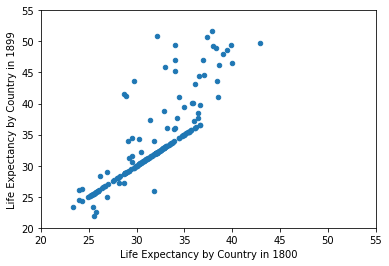

In [610]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()


### Thinking about the question at hand

In [611]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


### Assembling your data

In [614]:
# Concatenate the DataFrames row-wise
# gapminder = pd.concat([g1800s, g1900s, g2000s])
gapminder = pd.concat([country, g18, g19, g20], axis = 1)

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())


(260, 218)
         Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...    2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0    NaN    NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  28.14  28.13  ...    52.4  52.8  53.3  53.6  54.0  54.4  54.8  54.9  53.8   
2    NaN    NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  35.40  35.40  ...    76.6  76.8  77.0  77.2  77.4  77.5  77.7  77.9  78.0   
4  28.82  28.82  ...    75.3  75.5  75.7  76.0  76.1  76.2  76.3  76.3  76.4   

    2016  
0    NaN  
1  52.72  
2    NaN  
3

## Initial impressions of the data

#### Checking data types

df.dtypes

df['column'] = df['column'].to_numeric()

df['column'] = df['column'].astype(str)

#### Additional calculations and saving your data

In [ ]:
# make a calculation directly
df['new_column'] = df['column_1'] + df['column_2']

# or create a function and apply it accross rows of data
df['new_column'] = df.apply(my_function, axis = 1)

# save data to file
df.to_csv['my_data.csv']


### Reshaping your data

In [619]:
gapminder.head()

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(
    gapminder, 
    id_vars = 'Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year','life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())



                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


### Checking the data types

These are the types we expect:
 - country: object
 - year: int64
 - life_expectancy: float64

In [620]:
print(gapminder_melt.dtypes)

# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64

print(gapminder_melt.dtypes)


country             object
year                object
life_expectancy    float64
dtype: object
country             object
year                 int64
life_expectancy    float64
dtype: object


### Looking at country spellings

In [621]:
# Create the series of countries: countries
countries = gapminder_melt.country

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
# adding na=False got tis to actually work. Other wise I had float or string values instead of bool 
# and the invert ~ would break every time
mask = countries.str.contains(pattern, case=True, flags=0, na=False, regex=True)

# Invert the mask: mask_inverse
# For whatever reason ~ does not work for me here, though it did work in the class
mask_inverse =  ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)


49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


### More data cleaning and processing

In [622]:
print(gapminder_melt.shape)

# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

# Drop the missing values
gapminder_melt = gapminder_melt.dropna()

# Print the shape of gapminder
print(gapminder_melt.shape)


(56420, 3)
(43857, 3)


### Wrapping up

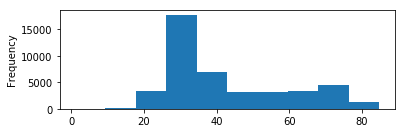

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


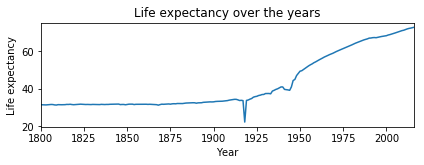

In [623]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind = 'hist')
plt.show()

# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder_melt.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')


## Final thoughts

- Well, this was not as fun as learning dplyr
- Having to reset the index on the data frame before I can join row wise was a total mess
- I also don't like how there is a mix of using () and not for methods like `head()` and `shape`
- I am getting the hang of pandas and cleaning data though. I feel like I learn A LOT of useful techniques in this class. 